In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Heart_Failure_Prediction.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
# correlation 
df_corr = df.corr()
df_corr['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

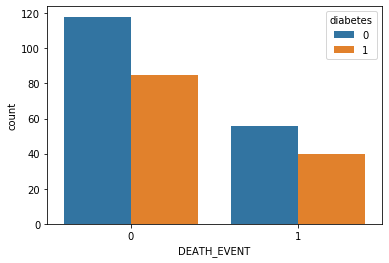

In [17]:
sns.countplot('DEATH_EVENT',hue='diabetes',data=df)

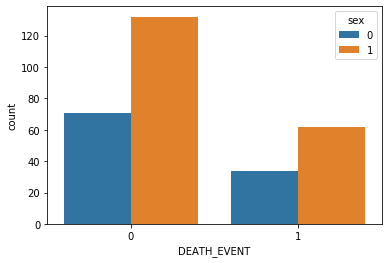

In [16]:
sns.countplot('DEATH_EVENT',hue='sex',data=df)

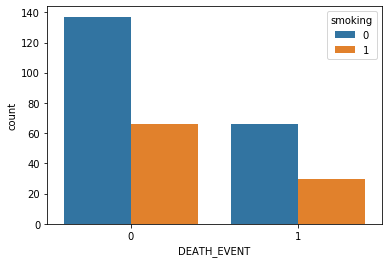

In [18]:
sns.countplot('DEATH_EVENT',hue='smoking',data=df)

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_feature =scaler.fit_transform(df.drop('DEATH_EVENT',axis=1))

data = pd.DataFrame(scale_feature,columns=[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,df['DEATH_EVENT'], test_size=0.33, random_state=42)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_predict = lg.predict(X_test)

print(f'Accuracy -> {accuracy_score(y_test,lg_predict)} ')
print('\n')
print(classification_report(y_test,lg_predict))
print('\n')
print(confusion_matrix(y_test,lg_predict))

Accuracy -> 0.7676767676767676 


              precision    recall  f1-score   support

           0       0.73      0.95      0.82        57
           1       0.88      0.52      0.66        42

    accuracy                           0.77        99
   macro avg       0.80      0.74      0.74        99
weighted avg       0.79      0.77      0.75        99



[[54  3]
 [20 22]]


# Cross-Validation -> KFold

In [36]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lg, scale_feature,df['DEATH_EVENT'],cv=10)
print(f'Score -> {score}')
      
print('\n')
      
print(f'Mean Score -> {score.mean()}')
print(f'Max Score -> {score.max()}')
print(f'Min Score -> {score.min()}')

Score -> [0.6        0.86666667 0.83333333 0.8        0.93333333 0.93333333
 0.9        0.86666667 0.73333333 0.68965517]


Mean Score -> 0.815632183908046
Max Score -> 0.9333333333333333
Min Score -> 0.6


 # Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)


print(f'Accuracy using randomforest -> {accuracy_score(y_test,rfc_predict)} ')
print('\n')
print(classification_report(y_test,rfc_predict))
print('\n')
print(confusion_matrix(y_test,rfc_predict))

Accuracy using randomforest -> 0.7373737373737373 


              precision    recall  f1-score   support

           0       0.72      0.89      0.80        57
           1       0.79      0.52      0.63        42

    accuracy                           0.74        99
   macro avg       0.75      0.71      0.71        99
weighted avg       0.75      0.74      0.73        99



[[51  6]
 [20 22]]


# AdaBoost 

In [46]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier()
boost.fit(X_train,y_train)
boost_predict = boost.predict(X_test)


print(f'Accuracy using AdaBoost -> {accuracy_score(y_test,boost_predict)} ')
print('\n')
print(classification_report(y_test,boost_predict))
print('\n')
print(confusion_matrix(y_test,boost_predict))

Accuracy using AdaBoost -> 0.7373737373737373 


              precision    recall  f1-score   support

           0       0.72      0.88      0.79        57
           1       0.77      0.55      0.64        42

    accuracy                           0.74        99
   macro avg       0.75      0.71      0.72        99
weighted avg       0.74      0.74      0.73        99



[[50  7]
 [19 23]]


# SVM

In [39]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)


print(f'Accuracy using SVM -> {accuracy_score(y_test,svm_predict)} ')
print('\n')
print(classification_report(y_test,svm_predict))
print('\n')
print(confusion_matrix(y_test,svm_predict))

Accuracy using SVM -> 0.7676767676767676 


              precision    recall  f1-score   support

           0       0.74      0.93      0.82        57
           1       0.85      0.55      0.67        42

    accuracy                           0.77        99
   macro avg       0.79      0.74      0.74        99
weighted avg       0.79      0.77      0.76        99



[[53  4]
 [19 23]]


# Hypertuning using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.725, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.725, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.725, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.725, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.725, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.725, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.725, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.725, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.750, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.725, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] .................... C=100, gamma=0.1, score=0.750, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.825, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.800, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.950, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.775, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.750, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.775, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [44]:
grid_predict = grid.predict(X_test)


print(f'Accuracy using SVM using Hyperparameter -> {accuracy_score(y_test,grid_predict)} ')
print('\n')
print(classification_report(y_test,grid_predict))
print('\n')
print(confusion_matrix(y_test,grid_predict))

Accuracy using SVM using Hyperparameter -> 0.7474747474747475 


              precision    recall  f1-score   support

           0       0.71      0.95      0.81        57
           1       0.87      0.48      0.62        42

    accuracy                           0.75        99
   macro avg       0.79      0.71      0.71        99
weighted avg       0.78      0.75      0.73        99



[[54  3]
 [22 20]]


In [45]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001}
